<a href="https://colab.research.google.com/github/Mepha89/Machine-Learning-with-Python/blob/main/Clothing_Image_Predictor/Clothing_Image_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# imports
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [11]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
# declaring clothing item names as class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

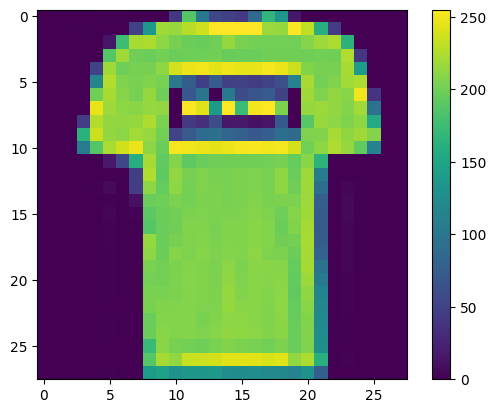

In [14]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# data processing scaling our greyscale pixel values (0-255) to be betwee
train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
# building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [18]:
# training the model

model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4963 - accuracy: 0.8271
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3738 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3377 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3119 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2963 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2805 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2695 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2592 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2484 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [19]:
# evaluating the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3470 - accuracy: 0.8796
Test accuracy: 0.8795999884605408


##Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

Pick a number: 8
1/1 [==============================] - 0s 27ms/step
Excpected: Sandal


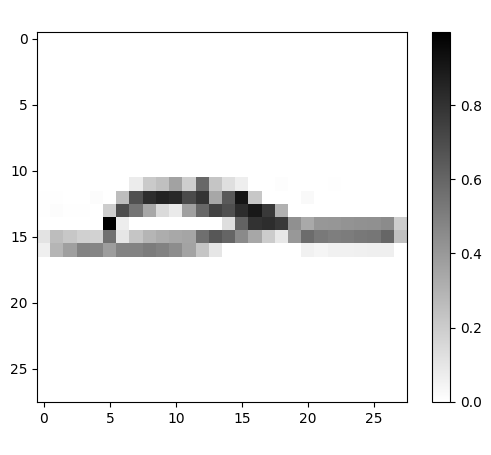

Guess: Sandal


In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  print("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Guess: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
